## План занятия

1. Постановка задачи и основная терминология
2.  Обзор основых классов алгоритмов машинного обучения:
 1. Логические
 2. Метрические
 3. Линейные
 4. Байесовы
3. Идеи композиции алгоритмов
 1. Boosting
 2. Stacking - meta-features
 3. Bagging
 4. RSM - random subspace method
 
По материалам <a href='https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK'>Воронцова</a>

## Формальная постановка задачи

<font size="3">
    
Сегодня поговорим о задаче **обучения с учителем**.

Но к задачам машинного обучения также относятся задачи **обучения без учителя** и **обучение с подкреплением**.

</font>

<font size="3">
    
Основные понятия и определения:

$X: (x_i, y_i), i = 1..m$ - обучающая выборка пар объект-ответ

$x_i = (x_{i1},..,x_{in}) = (f_1(x_i),..,f_n(x_i))$ - вектор признаков объекта $x_i$

$ L(a(x_i), y_i)$ - функция потерь алгоритма $a$ на объекте $x_i$

$Q(a, X) = \sum \limits_{i=1}^m  L(a(x_i), y_i)$ - функционал эмпирического риска

$Q(a, X) \rightarrow_\mu \min \limits_a$ - метод минимизации $\mu$ эмпирического риска

</font>

<font size="3">

Формально, обучение - это

$\left \{ \begin{matrix}f_1(x_1) & .. & f_n(x_1)\\ .. & .. & .. \\ f_1(x_l) & .. & f_n(x_l)\end{matrix}
\rightarrow
\begin{matrix}y_1 \\ .. \\ y_l\end{matrix} \right \}
\rightarrow_\mu
a
$

 
 </font>

<font size="3">

Хорошие курсы по машинному обучению конкретизируют вопросы:

- как задавать объекты и какими могут быть ответы
- в каком смысле $a$ приближает $y$
- как строить функцию $a$

</font>

### Как задаются объекты

<font size="3">

$f_j: X \rightarrow D_j$,  $j=1,...,n$ - признаки объектов

Типы признаков:
 - $D_j = \{0, 1\}$ - бинарный признак Пример: **мужской женский**
 - $|D_j| < \inf$ - номинальный признак Пример: **red green yellow**
 - $|D_j| < \inf$, $D_j$ - упорядочено - порядковый признак **понедельник вторник среда ...**
 - $D_j = \mathbb R$ - количественный признак

 
Матрица объекты-признаки
 
$F = ||f_j(x_i)||_{l \times n}$ = $\begin{bmatrix}f_1(x_1) & .. & f_n(x_1)\\ .. & .. & .. \\ f_1(x_l) & .. & f_n(x_l)\end{bmatrix}$

 
 </font>

### Как задаются ответы

<font size="3">

- Задача классификации
 - $Y = \{-1, +1\}$ - бинарная классификация
 - $Y = \{ 1,..., M \}$ - многоклассовая классификация
 - $Y = \{0, 1\}^M$ - классификация с пересечением классов
 

- Задача регрессии
  - $Y \subseteq \mathbb R^M $

</font>

## Обзор основных классов алгоритмов машинного обучения

<font size="3">

Дальше поговорим об алгоритмах приминительно к классификации, но сначала посмотрим на данные, к которым будем применять алгоритмы классификации

</font>

In [1]:
SEED = 1996

In [2]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris['data'], iris['target']
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                     test_size=0.2,
                                                     random_state=SEED )


feature_names = iris['feature_names']
names = iris['target_names']

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

[('setosa', 'red'), ('versicolor', 'green'), ('virginica', 'orange')]

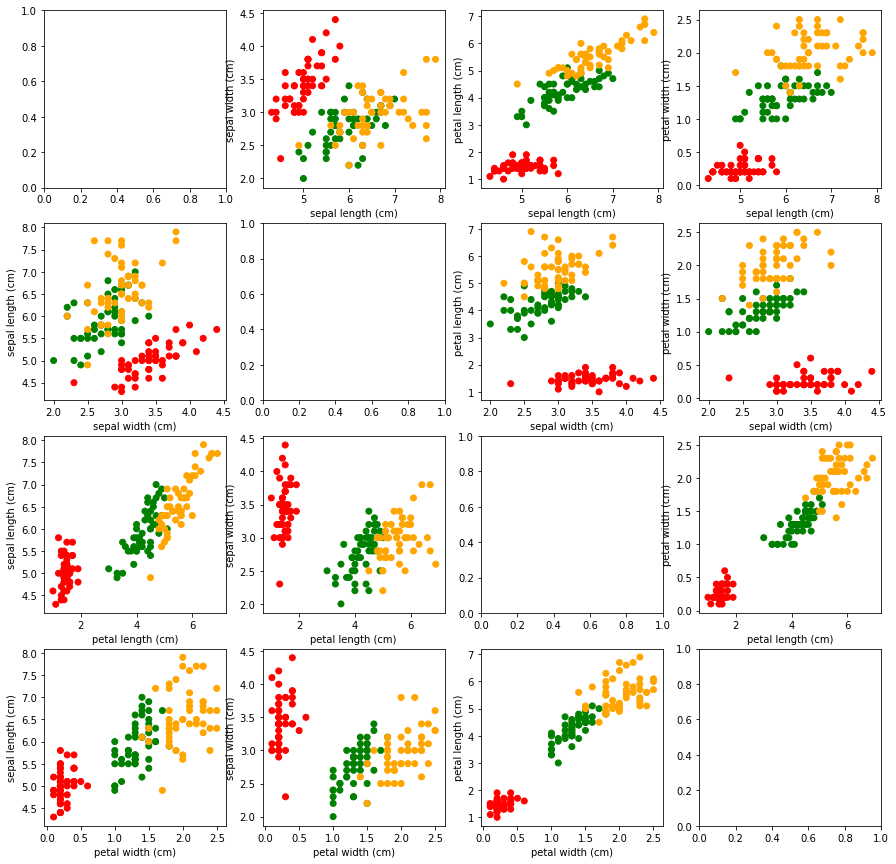

In [4]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

colors = ['red', 'green', 'orange']

for i in range(4):
    for j in range(4):
        if i != j:
            ax[i][j].scatter(X[:, i], X[:, j], c=[ colors[yi] for yi in y ])
            ax[i][j].set_xlabel(feature_names[i])
            ax[i][j].set_ylabel(feature_names[j])
            
[*zip(names, colors)]

In [5]:
import numpy as np

def show_hyperplane(clf_constructor):
    fig, ax = plt.subplots(4, 4, figsize=(15, 15))

    for i in range(4):
        for j in range(4):
            if i != j:
                X_train_ij = X_train[:,[i, j]]

                clf = clf_constructor().fit(X_train_ij, y_train)

                x_min, x_max = X_train_ij[:, 0].min() - 1, X_train_ij[:, 0].max() + 1
                y_min, y_max = X_train_ij[:, 1].min() - 1, X_train_ij[:, 1].max() + 1

                xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                     np.arange(y_min, y_max, 0.01))

                zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
                zz = zz.reshape(xx.shape)

                ax[i][j].contourf(xx, yy, zz)

                ax[i][j].scatter(X[:, i], X[:, j], c=[ colors[yi] for yi in y ])
                ax[i][j].set_xlabel(feature_names[i])
                ax[i][j].set_ylabel(feature_names[j])

### Логические

<font size="3">

Почему собственно логические - потому что ключевым элементом является **предикат**

Какие алгоритмы:

- Решающий пень
- Решающий список
- Рещающее дерево

<img src='https://upload.wikimedia.org/wikipedia/ru/thumb/c/c4/CART_tree_titanic_survivors_%28RU%29.svg/360px-CART_tree_titanic_survivors_%28RU%29.svg.png'>

</font>

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9333333333333333

### Как это все обучается - <a href='https://ru.coursera.org/lecture/vvedenie-mashinnoe-obuchenie/alghoritm-postroieniia-rieshaiushchiegho-dierieva-d9Rvs'>жадный алгоритм</a> - кликните, если не понимаете о чем речь

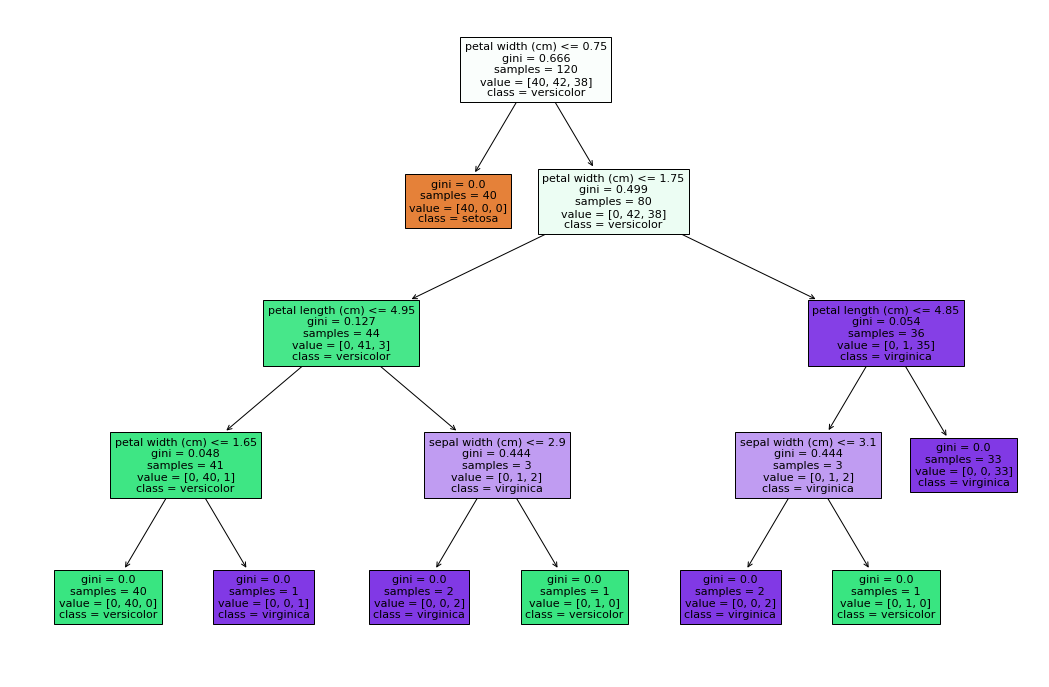

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

plot_tree(clf, feature_names=feature_names, class_names=names, ax=ax, filled=True)
ax

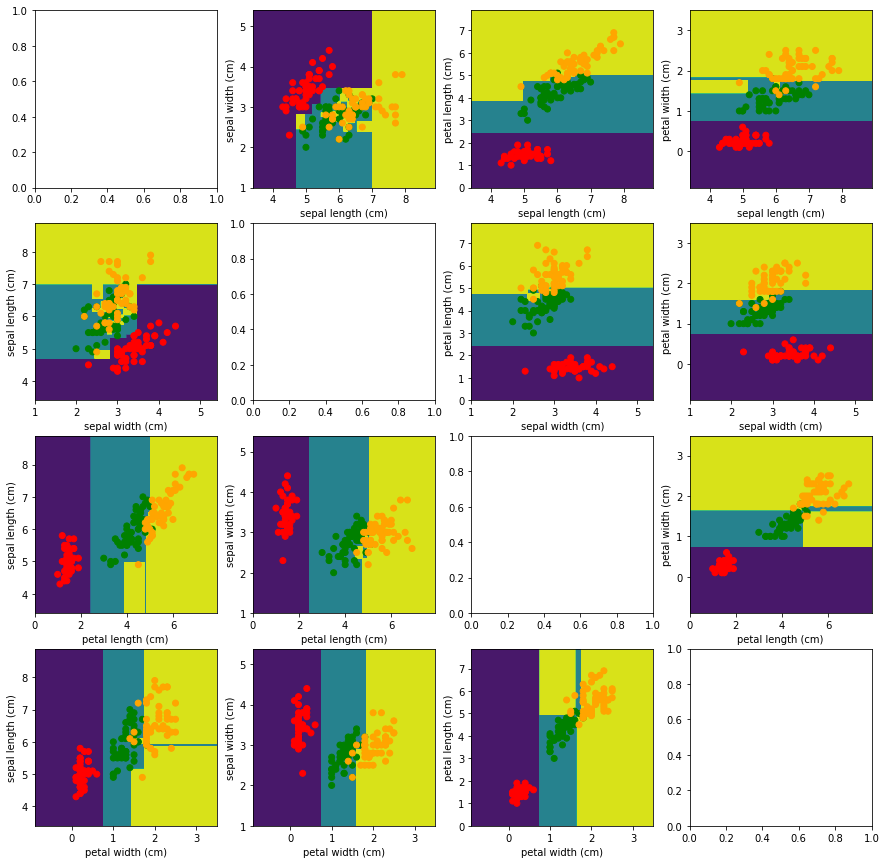

In [8]:
show_hyperplane(DecisionTreeClassifier)

### Метрические

<font size="3">

Почему собственно метрические - потому что ключевым элементом является **расстояние**

Какие алгоритмы:

- Метод ближайшего соседа
- Метод k ближайших соседий
- Метод k взвешенных ближайших соседий

<img src='https://www.ok-t.ru/studopediaru/baza5/523650011590.files/image001.gif' width='800'>

</font>

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9666666666666667

In [10]:
def MetricKNeighborsClassifier(x):
    def wrapper(*args, **kargs):
        return KNeighborsClassifier(*args, metric=x, **kargs)
    return wrapper

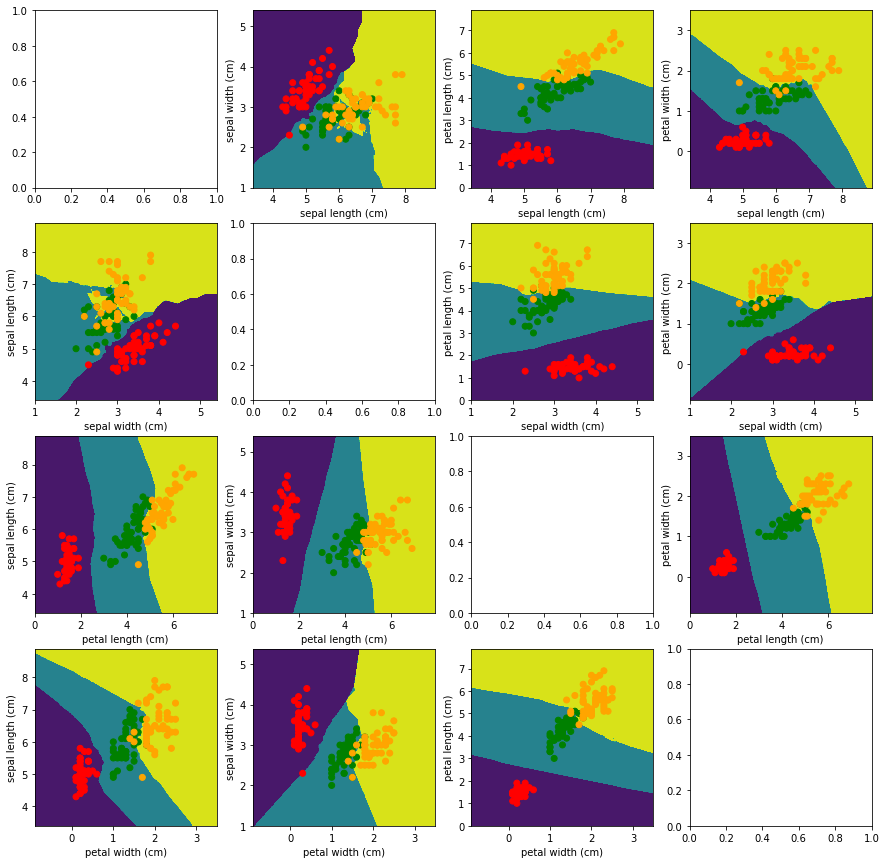

In [11]:
show_hyperplane(MetricKNeighborsClassifier('euclidean'))

### Линейные

<font size="3">

Почему собственно метрические - потому что ключевым элементом является **линейная комбинация**

Отличаются главным образом функцией потерь, которую стараются аппроксимировать

$$a(x, w) = sign(x^Tw)$$

$$M = y x^Tw$$

<img src='https://cf.ppt-online.org/files/slide/p/PT5djVxWvIrOaQkbeC6w2yBK7sEuGFDmZpHMUt/slide-8.jpg'>

</font>

In [12]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [13]:
def torch_float_cuda(data):
    return torch.FloatTensor(data).cuda()

class BinaryLinearClassifier(object):
    def __init__(self, approx):
        self.__approx = approx
        
        self.__max_iter = 1000   
        
    def fit(self, X, y):
        assert len(X.shape) == 2
        
        y = 2*y - 1

        self._w = torch.randn( X.shape[1], 1,
                               requires_grad=True,
                               device=torch.device('cuda') )

        opt = torch.optim.Adam([self._w], lr=0.001)

        for epoch in np.arange(self.__max_iter):
            X_torch = torch_float_cuda(X)
            y_torch = torch_float_cuda(y)

            Xw = torch.matmul(X_torch, self._w)
            y_torch = y_torch.reshape(Xw.shape)
            M = Xw*y_torch
            M = self.__approx(M)

            loss = torch.mean(M, dim=0)

            opt.zero_grad()
            loss.backward()
            opt.step()
 
        return self

    def predict(self, X):
        X_torch = torch_float_cuda(X)  
        
        Xw = torch.matmul(X_torch, self._w)

        y_pred = torch.sign(Xw).detach().cpu().numpy()
        y_pred = (y_pred + 1) / 2
        return y_pred.reshape(-1)
        

In [14]:
def exp_approx(M):
    return torch.exp(-M)

clf = BinaryLinearClassifier(exp_approx)
clf.fit(X_train[y_train < 2], y_train[y_train < 2])

y_pred = clf.predict(X_test[y_test < 2])

accuracy_score(y_test[y_test < 2], y_pred)

1.0

<font size='3'>
А класса то три, как с эти быть? 
    
Если не очевидно как это сделать, то есть подходы **one-vs-rest** и **one-vs-one**
</font>

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none', max_iter=1000)

clf.fit(X_train[y_train < 2], y_train[y_train < 2])

y_pred = clf.predict(X_test[y_test < 2])

accuracy_score(y_test[y_test < 2], y_pred)

1.0

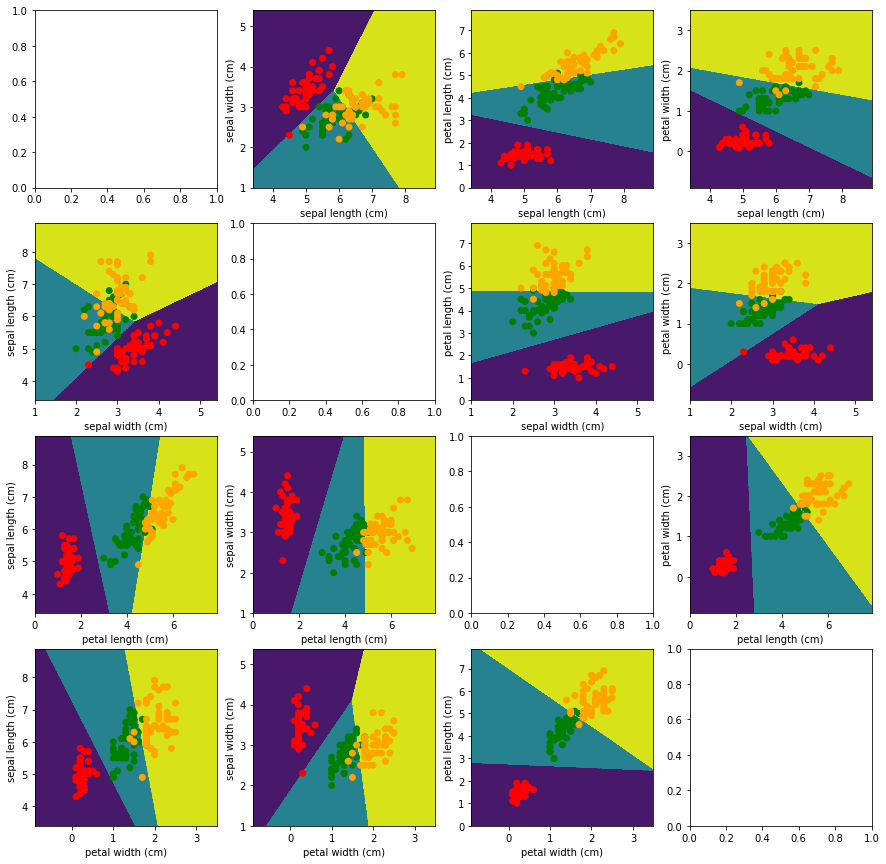

In [16]:
show_hyperplane(LogisticRegression)

### Байесовы

<font size="3">

Почему собственно метрические - потому что ключевым элементом является **вероятность** (Формула Байеса)

Наивный - потому что делаем предоложение, что признаки независимы

Отличаются распределением использующем при построении алгоритма

<img width='1200' src='https://i.ibb.co/C5q88cf/photo-2020-08-05-15-19-02.jpg'>

</font>

In [17]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9666666666666667

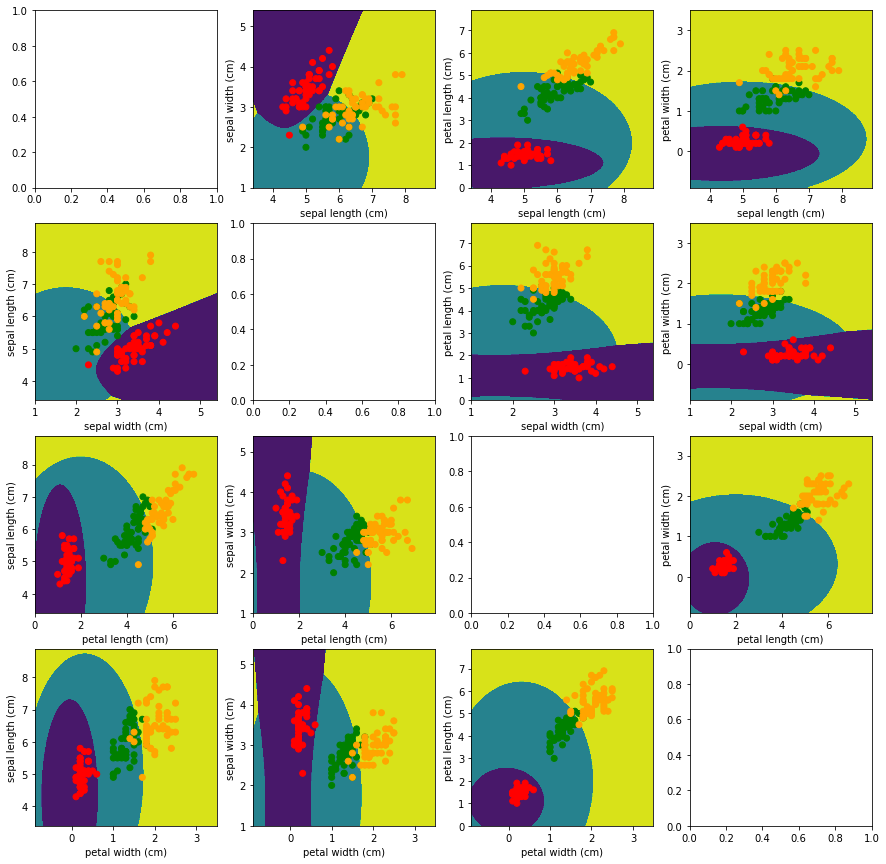

In [18]:
show_hyperplane(GaussianNB)

## Идеи композиции алгоритмов

<font size="3">

**Если без композиции**

В просто случае $a(x) = C(b(x))$,

$b: X \rightarrow R$ - базовый алгоритм

$C: R \rightarrow Y$ - решающее правило

$R$ - пространсто оценок

**Пример**:

Логистическая регрессия:

 - $b(x) = x^T w$
 - C(r) = sign(r)
 
Рещающее дерево:

 - b(x) = ответ рещающего дерева
 - С(r) = r
 
Метод N ближайщего соседа:

 - $b(x) = [l_1, ..., l_N]$
 - $C(r) = argmax(r)$

**Если с композицией**

$a(x) = C(F(b_1(x), ... , b_T(x))),$

где $F: R^T \rightarrow R$ - корректирующая операция, $R$ - просторанство оценок

    
</font>

<font size="3">

**Bagging / bootstrap**

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Bagging.png
'>
    
bootstrap - выбор с повторениями

bagging - это про пространство объектов
    
</font>

<font size="3">

**Random subsample method**

<img src='https://slideplayer.com/slide/12256374/72/images/6/Random+Subspace+Method.jpg'>
    
Выбираем из признакового пространства
    
</font>

<font size="3">

**Stacking / meta-features** - почитайте здесь <a href='https://dyakonov.org/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/'>статейку</a>
    
Что такое meta-признаки ?
   
<img src='https://alexanderdyakonov.files.wordpress.com/2017/03/stacking-2b.png?w=700'>

Meta-признак - это ответ базового алгоритма для объекта
    
</font>

<font size="3">

**Boosting** - почитайте здесь <a href='http://www.machinelearning.ru/wiki/images/9/9a/fonarev.overview_of_boosting_methods.pdf'>обзор</a>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Ensemble_Boosting.svg/1024px-Ensemble_Boosting.svg.png'>
    
Подбираем параметры последовательно - жадным образом
    
    
</font>

<font size='3'>
$F_m(x) = F_{m-1}(x) + \lambda \times b_m(x)$ - ищем сначала $b_m(x)$ - базовый алгоритм, потом $\lambda$.
    
x - параметр.
  
$\tilde y_m = F_m(x') = F_{m-1}(x') + \lambda \times b_m(x')$

x' - конткретная точка.

$Q(\tilde y_m, y') = loss(\tilde y_m, y')$

Как поправить $\tilde y_{m-1}$, чтобы $\tilde y_m$ стало ближе к $y'$?

Двигаемся по антиградиенту, Ватсон!

То есть $b_m(x') = -\nabla Q(\tilde y_{m-1}, y')$ 

Для $Q$ можем взять производную в явном виде. Производная по $\tilde y_{m-1}$

Ответами для обучения $b_m(x)$ будет $-\nabla Q(\tilde y_{m-1}, y')$

</font>